In [5]:
import json

import importlib
import bucket_ops
import my_agents
import pandas as pd
import schedule_manager



importlib.reload(bucket_ops)

gcs = bucket_ops.GCSBucketManager(bucket_name="clinic_sim")



In [6]:
schedule_ops = schedule_manager.ScheduleCSVManager(gcs_manager=gcs, csv_blob_path="clinic_data/nurse_schedule.csv")

In [7]:
data = schedule_ops.get_all()

In [8]:
data

[{'id': 'N0001',
  'patient': 'P0001',
  'date': '2026-01-22',
  'time': '8:00',
  'status': 'done'},
 {'id': 'N0001',
  'patient': '',
  'date': '2026-01-22',
  'time': '8:30',
  'status': ''},
 {'id': 'N0001',
  'patient': 'P0002',
  'date': '2026-01-22',
  'time': '9:00',
  'status': 'done'},
 {'id': 'N0001',
  'patient': 'P0003',
  'date': '2026-01-22',
  'time': '9:30',
  'status': 'current'},
 {'id': 'N0001',
  'patient': '',
  'date': '2026-01-22',
  'time': '10:00',
  'status': ''},
 {'id': 'N0001',
  'patient': 'P0004',
  'date': '2026-01-22',
  'time': '10:30',
  'status': ''},
 {'id': 'N0001',
  'patient': 'P0005',
  'date': '2026-01-22',
  'time': '11:00',
  'status': ''},
 {'id': 'N0001',
  'patient': 'P0006',
  'date': '2026-01-22',
  'time': '11:30',
  'status': ''},
 {'id': 'N0001',
  'patient': '',
  'date': '2026-01-22',
  'time': '12:00',
  'status': 'break'},
 {'id': 'N0001',
  'patient': '',
  'date': '2026-01-22',
  'time': '12:30',
  'status': 'break'},
 {'id': '

In [3]:
csv_data = gcs.read_file_as_string(f"clinic_data/nurse_schedule.csv")


In [2]:
file_list = gcs.list_files("patient_data/P0001/raw_data/")

In [3]:
file_list

['patient_data_P0001_raw_data_encounter_report_0_2026-01-19.png',
 'patient_data_P0001_raw_data_encounter_report_1_2025-10-19.png',
 'patient_data_P0001_raw_data_encounter_report_2_2025-07-19.png',
 'patient_data_P0001_raw_data_imaging_report_0_2026-01-19.png',
 'patient_data_P0001_raw_data_imaging_report_2_2025-07-19.png',
 'patient_data_P0001_raw_data_lab_report_0_2025-07-19.png',
 'patient_data_P0001_raw_data_lab_report_1_2025-10-19.png',
 'patient_data_P0001_raw_data_lab_report_2_2026-01-19.png',
 'patient_data_P0001_referral_letter.png']

In [9]:
with open("output/history_data.json", "r", encoding="utf-8") as f:
    data_history = json.load(f)

In [10]:
gcs.create_file_from_string(
    json.dumps(data_history, indent=4),
    f"patient_data/P0001/pre_consultation_chat.json",
    content_type="application/json"
)

Content uploaded to patient_data/P0001/pre_consultation_chat.json.


True

In [11]:
pre_consult_chat_path = f"patient_data/P0001/pre_consultation_chat.json"
content_str = gcs.read_file_as_string(pre_consult_chat_path)
history_data = json.loads(content_str)


# with open("output/history_data.json", "w", encoding="utf-8") as f:
#     json.dump(history_data, f, indent=4)
history_data

{'conversation': [{'sender': 'admin',
   'message': 'Hello, this is Linda the Hepatology Clinic admin desk. How can I help you today?'},
  {'sender': 'patient',
   'message': 'I want to book appointment',
   'attachments': [],
   'form_data': None},
  {'message': 'To book an appointment, please first confirm if you have booked through the NHS App. If so, please provide a screenshot of your booking confirmation.',
   'action_type': 'TEXT_ONLY',
   'sender': 'admin'},
  {'sender': 'patient',
   'message': 'I dont have any booking',
   'attachments': [],
   'form_data': None},
  {'message': 'No problem. To help us prepare for your visit, please fill out this intake form.',
   'action_type': 'SEND_FORM',
   'form_request': {'name': '',
    'firstName': '',
    'lastName': '',
    'dob': '',
    'age': None,
    'gender': '',
    'occupation': '',
    'maritalStatus': '',
    'contact': {'phone': '',
     'email': '',
     'address': {'street': '', 'city': '', 'state': '', 'zipCode': ''},
 

In [2]:
files = gcs.list_files(folder_path="patient_data/P0001/")

In [32]:
import requests

url = "https://iso-clinic-v2.vercel.app/api/board-items"

response  = requests.get(url)
data = response.json()
with open("output/data_board.json", "w", encoding="utf-8") as f:
    json.dump(data, f, indent=4)

In [ ]:
file_list = gcs.list_files("patient_data/P0001/board_items/")

board_objects = []

# results = []
for file in file_list:
    file_path = f"patient_data/P0001/board_items/{file}"
    raw_data = gcs.read_file_as_string(file_path)
    raw_objects = json.loads(raw_data)
    # results.append({
    #     "file" : file,
    #     "data": raw_objects
    # })

    if "referral.json" in file:
        rec = {
            "id": "referral-doctor-info",
            "date" : raw_objects.get("date",""),
            "visitType" : raw_objects.get("visitType",""),
            "provider" : raw_objects.get("provider",""),
            "specialty" : raw_objects.get("specialty",""),
            "rawText" : raw_objects.get("rawText",""),
            "dataSource" : raw_objects.get("dataSource",""),
            "highlights" : raw_objects.get("highlights",[]),
        }
        board_objects.append(rec)
        rec2 = {
            "id": "referral-letter-image",
            "date" : raw_objects.get("date",""),
            "studyType" : raw_objects.get("studyType",""),
            "provider" : raw_objects.get("provider",""),
            "specialty" : raw_objects.get("specialty",""),
            "imageUrl" : raw_objects.get("imageUrl",""),
            "dataSource" : raw_objects.get("dataSource",""),
        }
        board_objects.append(rec)
    elif "raw_images.json" in file:
        board_objects += raw_objects
    elif "encounters.json" in file:
        for i, e in enumerate(raw_objects):
            e['id'] = f"single-encounter-{i+1}"
            board_objects.append(e)
    elif "patient_context.json" in file:
        raw_objects['id'] = "dashboard-item-patient-context"
        board_objects.append(raw_objects)

        raw_objects['id'] = "sidebar-1"
        board_objects.append(raw_objects)
    elif "dashboard_analysis.json" in file:
        raw_objects['id'] = "adverse-event-analytics"
        board_objects.append(raw_objects)
    elif "dashboard_lab_latest.json" in file:
        board_objects.append({
            "id": "dashboard-item-lab-table",
            "labResults" : raw_objects
        })
    elif "dashboard_lab_chart.json" in file:
        board_objects.append({
            "id": "dashboard-item-lab-chart",
            "chartData" : raw_objects
        })
    elif "dashboard_pre_diagnosis.json" in file:
        board_objects.append({
            "id": "differential-diagnosis",
            "differential" : raw_objects
        })
    elif "dashboard_encounters_track.json" in file:
        board_objects.append({
            "id": "encounter-track-1",
            "encounters" : raw_objects
        })
    elif "dashboard_medication_track.json" in file:
        board_objects.append({
            "id": "medication-track-1",
            "data" : raw_objects
        })
    elif "dashboard_lab_track.json" in file:
        board_objects.append({
            "id": "lab-track-1",
            "data" : raw_objects
        })
    elif "dashboard_risk_event_track.json" in file:
        board_objects.append({
            "id": "risk-track-1",
            "risks" : raw_objects.get("risks")
        })
        board_objects.append({
            "id": "key-events-track-1",
            "events" : raw_objects.get("events")
        })

    


In [19]:
with open("board_preprocess_results.json", "w", encoding="utf-8") as f:
    json.dump(results, f,indent=4)

In [35]:
import requests

BASE_URL = "http://localhost:8000"

endpoint = f"{BASE_URL}/process/P0002/board-update"

response = requests.get(endpoint)
response.json()


{'status': 'success', 'message': 'Board objects have been processed.'}

In [10]:
import requests
import pandas as pd
BASE_URL = "http://localhost:8000"
# BASE_URL = "https://clinic-sim-pipeline-481780815788.europe-west1.run.app"

# endpoint = f"{BASE_URL}/slots"
endpoint = f"{BASE_URL}/schedule/N0001"

response = requests.get(endpoint)
data = response.json()
df = pd.DataFrame(data)
df


,id,patient,date,time,status
0,N0001,P0001,2026-01-22,9:00,done
1,N0001,P0002,2026-01-22,9:30,current
2,N0001,P0003,2026-01-22,10:00,
3,N0001,,2026-01-22,10:30,
4,N0001,,2026-01-22,11:00,
5,N0001,P0006,2026-01-22,11:30,
6,N0001,,2026-01-22,12:00,break
7,N0001,,2026-01-22,12:30,break
8,N0001,P0007,2026-01-22,13:00,
9,N0001,P0004,2026-01-22,13:30,


✅ Success! Displaying image:


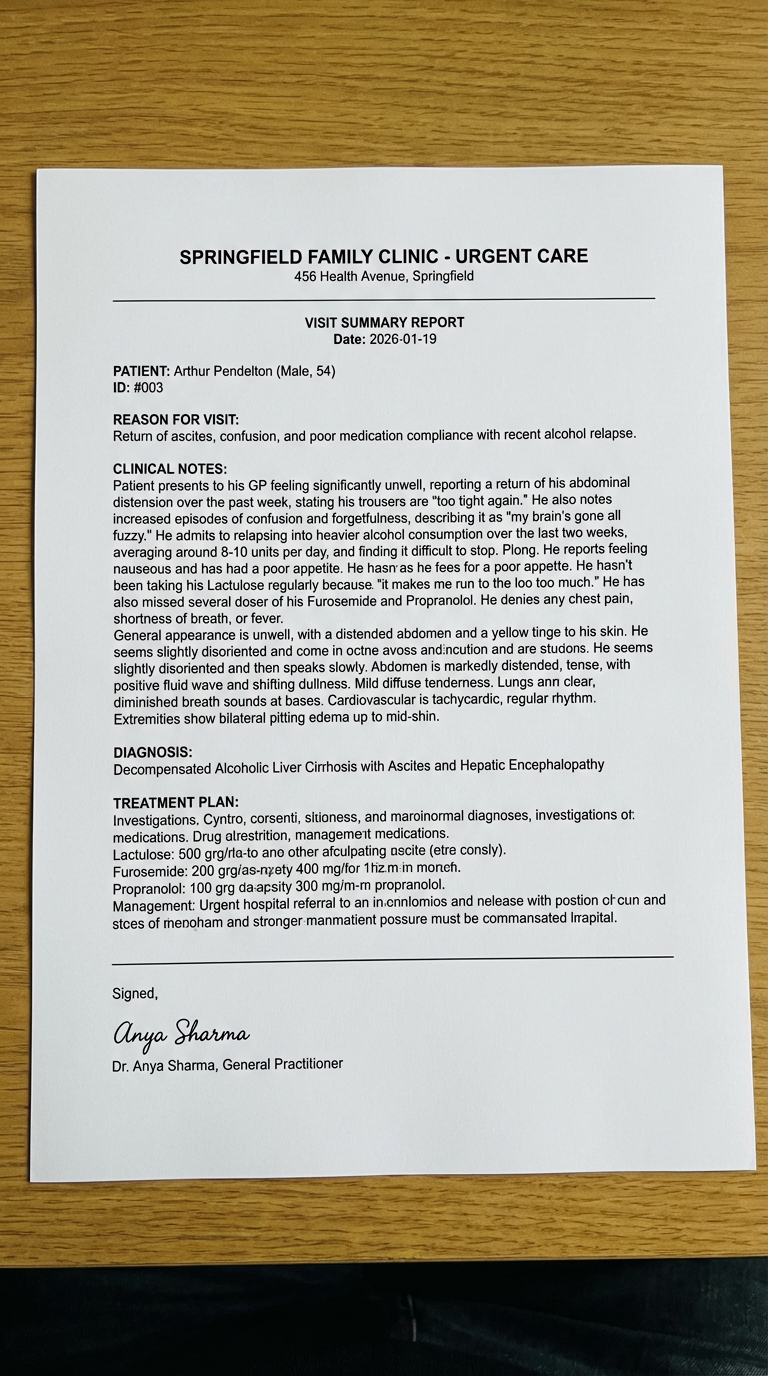

In [18]:
from IPython.display import Image, display
# BASE_URL = "https://clinic-sim-pipeline-481780815788.europe-west1.run.app" # or your deployed URL
BASE_URL = "http://localhost:8000"

PATIENT_ID = "P0001"
FILENAME = "patient_data_P0001_raw_data_encounter_report_0_2026-01-19.png"

url = f"{BASE_URL}/image/{PATIENT_ID}/{FILENAME}"

response = requests.get(url)

# 3. Check and Display
if response.status_code == 200:
    print("✅ Success! Displaying image:")
    # response.content contains the raw binary data (bytes)
    display(Image(data=response.content))
else:
    print(f"❌ Error {response.status_code}: {response.text}")

In [9]:
import requests

BASE_URL = "http://localhost:8000"
# BASE_URL = "https://clinic-sim-pipeline-481780815788.europe-west1.run.app"

endpoint = f"{BASE_URL}/schedule/switch_slots"

payload = {
    "clinician_id": "N0001",
    "item1" : {
        "patient": "",
        "date": "2026-01-22",
        "time": "13:30"
    },
    "item2" : {
        "patient": "",
        "date": "2026-01-22",
        "time": "14:00"
    }

}

response = requests.post(endpoint, json=payload)
data = response.json()
data
# df = pd.DataFrame(data)
# df


{'message': 'Schedule updated successfully.'}

In [20]:
patient_seed = {
    "description": "A 44-year-old male presents with profound malaise and a dull, aching sensation localized to the right upper quadrant of the abdomen. Clinical examination reveals mild scleral icterus and a noticeable distension of the abdominal cavity. The patient reports a sudden onset of dark, tea-colored urine and pale, clay-colored stools over the past week. Serum analysis indicates a significant elevation in hepatic transaminases, with ALT and AST levels exceeding ten times the upper limit of normal. Additionally, there is a marked increase in total bilirubin and a prolonged prothrombin time, suggesting compromised synthetic function and acute parenchymal inflammation. The patient describes a recent history of significant fatigue and a loss of appetite, often accompanied by low-grade evening fevers.",
    "encounters_count": 5,
    "imaging_count_in_encounters": 2
}

import requests

BASE_URL = "http://localhost:8000"
# BASE_URL = "https://clinic-sim-pipeline-481780815788.europe-west1.run.app"

endpoint = f"{BASE_URL}/generate/patient"



response = requests.post(endpoint, json=patient_seed)
data = response.json()
data
# df = pd.DataFrame(data)
# df


{'detail': "500: Failed to process patient: 400 INVALID_ARGUMENT. {'error': {'code': 400, 'message': 'Provided image is not valid.', 'status': 'INVALID_ARGUMENT'}}"}

In [24]:
BASE_URL = "http://localhost:8000"
# BASE_URL = "https://clinic-sim-pipeline-481780815788.europe-west1.run.app"

endpoint = f"{BASE_URL}/process/PT-D7E85CA9/board-update"
response = requests.get(endpoint)


In [ ]:
# BASE_URL = "https://clinic-sim-pipeline-481780815788.europe-west1.run.app"

endpoint = f"{BASE_URL}/schedule/switch"

payload = {
    "clinician_id": "N0001",
    "date": "2023-11-01",
    "time" : "",
    "patient": "P0004",
    "status" : ""
}

response = requests.post(endpoint, json=payload)

In [15]:
import requests

BASE_URL = "http://localhost:8000"
# BASE_URL = "https://clinic-sim-pipeline-481780815788.europe-west1.run.app"

endpoint = f"{BASE_URL}/schedule/switch"

payload = {
    "clinician_id": "N0001",
    "item1" : {
        "patient": "P0004",
        "date": "2026-01-22",
        "time": "11:00"
    },
    "item2" : {
        "patient": "P0005",
        "date": "2026-01-22",
        "time": "10:30"
    }

}

response = requests.post(endpoint, json=payload)
data = response.json()
data
# df = pd.DataFrame(data)
# df


{'message': 'Schedule updated successfully.'}

In [31]:
import requests

BASE_URL = "http://localhost:8000"
# BASE_URL = "https://clinic-sim-pipeline-481780815788.europe-west1.run.app"

endpoint = f"{BASE_URL}/data/P0001/board_objects.json"

response = requests.get(endpoint)
response.json()


[{'adverseEvents': [{'event': 'Hepatocellular Injury',
    'severity': 'Severe',
    'description': 'Elevated ALT (110.0 U/L) and AST (150.0 U/L) with a high ALT/AST ratio, indicative of hepatocellular damage.'},
   {'event': 'Cholestatic Injury',
    'severity': 'Severe',
    'description': 'Elevated Total Bilirubin (6.8 mg/dL) with a high ALT/AST ratio, suggesting a cholestatic component.'},
   {'event': 'Hepatic Encephalopathy',
    'severity': 'Severe',
    'description': "Patient presents with confusion, disorientation, and 'fuzzy brain', consistent with hepatic encephalopathy, exacerbated by alcohol relapse and poor medication compliance."},
   {'event': 'Ascites',
    'severity': 'Severe',
    'description': 'Significant abdominal distension, positive fluid wave, and shifting dullness noted on examination, consistent with decompensated liver disease.'},
   {'event': 'Hypoalbuminemia',
    'severity': 'Moderate',
    'description': 'Low serum albumin (2.2 g/dL) is consistent with

In [34]:
data = response.json()
counter = 0
for d in data:
    if "zone" in d:
        counter = counter + 1

counter

24

In [21]:
import requests

BASE_URL = "http://localhost:8000"

endpoint = f"{BASE_URL}/patients"

response = requests.get(endpoint)
response.json()


[{'patient_id': 'P0001',
  'name': 'Arthur Pendelton',
  'firstName': 'Arthur',
  'lastName': 'Pendelton',
  'dob': '1970-03-15',
  'age': 54,
  'gender': 'Male',
  'occupation': 'Former Bricklayer, Unemployed',
  'maritalStatus': 'Unknown',
  'biometrics': {'height_cm': 175, 'weight_kg': 85, 'bmi': 27.8},
  'contact': {'phone': '+44 7700 900123',
   'email': 'arthur.pendelton@example.com',
   'address': {'street': '10 Downing Street',
    'city': 'Manchester',
    'state': 'Greater Manchester',
    'zipCode': 'M1 1AA'},
   'emergency': {'name': 'Eleanor Pendelton',
    'relation': 'Sister',
    'phone': '+44 7700 900456'}},
  'complaint': 'Massive abdominal swelling, confusion, and jaundice.',
  'medical_history': ['Alcoholic Liver Cirrhosis (diagnosed 5 years ago, Child-Pugh B)',
   'Esophageal Varices (status post endoscopic band ligation 2 years ago)',
   'Major Depressive Disorder (diagnosed 10 years ago)',
   'Appendectomy (childhood)'],
  'social_history': {'smoking_status': 'Fo

In [19]:
response.status_code

500

In [25]:
import requests

BASE_URL = "http://localhost:8000"

endpoint = f"{BASE_URL}/data/P0001/board_objects.json"

response = requests.get(endpoint)
board_data = response.json()
board_data

with open(f"output/board_data_pipeline.json", "w", encoding="utf-8") as f:
    json.dump(board_data, f, indent=4)

In [28]:
len(board_data)
missed = []
for b in board_data:
    if 'componentType' not in b:
        missed.append(b['id'])

In [29]:
missed

[]

In [30]:
import requests

BASE_URL = "http://localhost:8000"

endpoint = f"{BASE_URL}/process/P0001/board-update"

response = requests.get(endpoint)
board_data = response.json()
board_data

# with open(f"output/board_data_pipeline.json", "w", encoding="utf-8") as f:
#     json.dump(board_data, f, indent=4)

{'status': 'success', 'message': 'Board objects have been processed.'}

In [15]:
import requests

BASE_URL = "http://localhost:8000"
PATIENT_ID = "P0001"  # <--- REPLACE THIS with an actual ID from your generation step

endpoint = f"{BASE_URL}/chat/{PATIENT_ID}/reset"

response = requests.post(endpoint, json={"patient_id": PATIENT_ID})
response.json()


{'status': 'success',
 'message': 'Chat history has been reset.',
 'current_state': {'conversation': [{'sender': 'admin',
    'message': 'Hello, this is Linda the Hepatology Clinic admin desk. How can I help you today?'}]}}

In [6]:
import requests

BASE_URL = "https://clinic-sim-pipeline-481780815788.europe-west1.run.app"
PATIENT_ID = "P0001"  # <--- REPLACE THIS with an actual ID from your generation step

endpoint = f"{BASE_URL}/chat/{PATIENT_ID}"

response = requests.get(endpoint)
response.json()


{'conversation': [{'sender': 'admin',
   'message': 'Hello, this is Linda the Hepatology Clinic admin desk. How can I help you today?'},
  {'sender': 'patient', 'message': 'hi', 'attachments': [], 'form_data': {}},
  {'message': 'Hello, this is Linda the Hepatology Clinic admin desk. Have you booked an appointment through the NHS App?',
   'action_type': 'TEXT_ONLY',
   'sender': 'admin'},
  {'sender': 'patient', 'message': 'nope', 'attachments': [], 'form_data': {}},
  {'message': 'Thank you. Please confirm your details in this form.',
   'action_type': 'SEND_FORM',
   'form_request': {'name': '',
    'firstName': '',
    'lastName': '',
    'dob': '',
    'age': None,
    'gender': '',
    'occupation': '',
    'maritalStatus': '',
    'contact': {'phone': '',
     'email': '',
     'address': {'street': '', 'city': '', 'state': '', 'zipCode': ''},
     'emergency': {'name': '', 'relation': '', 'phone': ''}},
    'complaint': '',
    'medical_history': [],
    'allergies': []},
   's

In [ ]:
import requests
import json
import sys

# Configuration
BASE_URL = "http://localhost:8000"
# REPLACE with a patient_id that actually exists in your data
DEFAULT_PATIENT_ID = "P0001" 
DEFAULT_MESSAGE = "Hello, I would like to book an appointment with the hepatologist."

def test_send_message(patient_id, message):
    endpoint = f"{BASE_URL}/chat"
    
    payload = {
        "patient_id": patient_id,
        "patient_message": message
    }

    print(f"🔵 sending POST request to: {endpoint}")
    print(f"📤 Payload: {json.dumps(payload, indent=2)}")
    print("-" * 40)

    try:
        response = requests.post(endpoint, json=payload)
        
        # Check success
        if response.status_code == 200:
            return response
            
        elif response.status_code == 404:
            print("❌ FAILED (404 Not Found)")
            print(f"Reason: {response.json().get('detail')}")
            print("Hint: This usually means the patient_id folder or chat history file doesn't exist yet.")
            
        else:
            print(f"❌ FAILED ({response.status_code})")
            print(response.text)

    except requests.exceptions.ConnectionError:
        print("❌ CRITICAL ERROR: Could not connect to server.")
        print("Is the server running? Try: python server.py")


    
response_chat = test_send_message(DEFAULT_PATIENT_ID, DEFAULT_MESSAGE)

🔵 sending POST request to: http://localhost:8000/chat
📤 Payload: {
  "patient_id": "P0001",
  "patient_message": "What is the available schedule for the hepatologist?"
}
----------------------------------------


In [20]:
response_chat.json()

{'patient_id': 'P0001',
 'nurse_response': {'message': 'Thanks. Here are the available slots for Dr. A. Gupta.',
  'action_type': 'OFFER_SLOTS',
  'available_slots': {'doctorName': 'Dr. A. Gupta',
   'specialty': 'Hepatology',
   'slots': [{'slotId': 'SLOT_10_AM',
     'date': '2025-12-10',
     'time': '09:30 AM',
     'type': 'In-Person'},
    {'slotId': 'SLOT_11_PM',
     'date': '2025-12-11',
     'time': '02:00 PM',
     'type': 'In-Person'},
    {'slotId': 'SLOT_12_AM',
     'date': '2025-12-12',
     'time': '10:00 AM',
     'type': 'In-Person'}]}},
 'status': 'success'}

In [6]:
raw_data = json.loads(gcs.read_file_as_string(f"patient_data/P0001/raw_data.json"))
raw_data

{'encounter_reports': [{'file': 'encounter_report_0_2026-01-19.txt',
   'date_time': '2026-01-19',
   'encounter_report_text': '   SPRINGFIELD FAMILY CLINIC - URGENT CARE\n   456 Health Avenue, Springfield\n   ----------------------------------------\n   VISIT SUMMARY REPORT\n   Date: 2026-01-19\n\n   PATIENT: Arthur Pendelton (Male, 54)\n   ID: #003\n\n   REASON FOR VISIT:\n   Return of ascites, confusion, and poor medication compliance with recent alcohol relapse.\n\n   CLINICAL NOTES:\n   Patient presents to his GP feeling significantly unwell, reporting a return of his abdominal distension over the past week, stating his trousers are "too tight again." He also notes increased episodes of confusion and forgetfulness, describing it as "my brain\'s gone all fuzzy." He admits to relapsing into heavier alcohol consumption over the last two weeks, averaging around 8-10 units per day, finding it difficult to stop. He reports feeling nauseous and has had a poor appetite. He hasn\'t been ta

In [4]:
file_inventory = json.loads(gcs.read_file_as_string(f"patient_data/P0001/pre_consultation_chat.json"))

In [ ]:
res = {
    "conversation" : [
            {
            'sender': 'admin',
            'message': 'Hello, this is Linda the Hepatology Clinic admin desk. How can I help you today?'
            }
    ]
}
gcs.create_file_from_string(json.dumps(res, indent=4), f"patient_data/P0001/pre_consultation_chat.json", content_type="application/json")

Content uploaded to patient_data/P0001/pre_consultation_chat.json.


True

In [5]:
file_inventory

{'conversation': [{'sender': 'admin',
   'message': 'Hello, thank you for contacting the General Hepatology Clinic. How can I help you today?'},
  {'sender': 'patient',
   'message': "Alright, I need to book an appointment with the specialist. I'm not feeling too good."},
  {'sender': 'admin',
   'message': 'I can help you with that. To confirm your identity, could you please provide your full name, date of birth, and current address?'},
  {'sender': 'patient',
   'message': 'Arthur Pendelton. Born 15th March 1970. I live at Flat 3, 12 Elm Street, Manchester.'},
  {'sender': 'admin',
   'message': "Thank you, Mr. Pendelton. Could you please describe your main symptoms and how long you've been experiencing them?"},
  {'sender': 'patient',
   'message': "Well, me belly's massive, looks like I'm gonna burst. And I'm feelin' proper confused, like I'm not myself. My eyes have gone yellow too. It's been getting worse for a few weeks now, especially the confusion, that's only been a few days.

In [2]:
def group_labs_by_date(labs_data):

        grouped = {}

        for item in labs_data:
            # Extract static metadata for this biomarker
            biomarker_name = item.get("biomarker")
            unit = item.get("unit")
            ref_min = item.get("referenceRange", {}).get("min")
            ref_max = item.get("referenceRange", {}).get("max")

            # Iterate through the time-series values
            for measurement in item.get("values", []):
                timestamp = measurement.get("t")
                value = measurement.get("value")

                # Initialize the date group if it doesn't exist
                if timestamp not in grouped:
                    grouped[timestamp] = {
                        "date_time": timestamp,
                        "labs": []
                    }

                # Determine Flag (High/Low/Normal)
                flag = "NORMAL"
                if ref_min is not None and ref_max is not None:
                    if value < ref_min:
                        flag = "LOW"
                    elif value > ref_max:
                        flag = "HIGH"

                # Add this specific result to the group
                grouped[timestamp]["labs"].append({
                    "biomarker": biomarker_name,
                    "value": value,
                    "unit": unit,
                    "reference_range": f"{ref_min} - {ref_max}",
                    "flag": flag
                })

        # Convert dictionary to a list and sort by date (Newest last)
        # ISO 8601 dates (YYYY-MM-DD) sort correctly as strings
        sorted_results = sorted(list(grouped.values()), key=lambda x: x['date_time'])
        
        return sorted_results

In [3]:
with open("output/P0001/labs.json", "r", encoding="utf-8") as f:
    labs = json.load(f)

In [4]:
labs_data = group_labs_by_date(labs)

In [8]:
len(labs_data)
for i, lab_ in enumerate(labs_data):
    with open(f"output/P0001/lab{i+1}.json", "w", encoding="utf-8") as f:
        json.dump(lab_, f, indent=4)